In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

def bit_to_freq(bits, N):
    possible = [i for i in range(N)]
    for b in bits:
        if b[0]:
            possible = possible[:len(possible)//2]
        else:
            possible = possible[len(possible)//2:]
    return possible[0]

Results
- Energy test also performs very well for singleton detection at low snr
- Fixed random shift better than varying random shift but still not as good as constant
- Confidence of incorrect predictions is not predictable

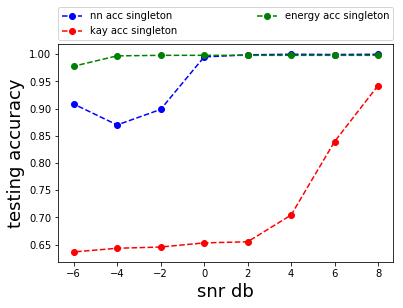

In [3]:
# 10 trials at each snr
# 3 conv layers [[5, 2], [3, 2], [3, 2]] to one softmax layer
# kay value calculated by getting threshhold that would give max accuracy
# N=27000 possible freq, m=300 samples

plt.plot(np.load('../data/singleton/snrs.npy'), np.load('../data/singleton/nn_accs.npy'), '--bo', label='nn acc singleton')
plt.plot(np.load('../data/singleton/snrs.npy'), np.load('../data/singleton/kay_accs.npy'), '--ro', label='kay acc singleton')
plt.plot(np.load('../data/singleton/snrs.npy'), np.load('../data/singleton/energy_acc2.npy'), '--go', label='energy acc singleton')
plt.xlabel('snr db', fontsize=18)
plt.ylabel('testing accuracy', fontsize=18)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

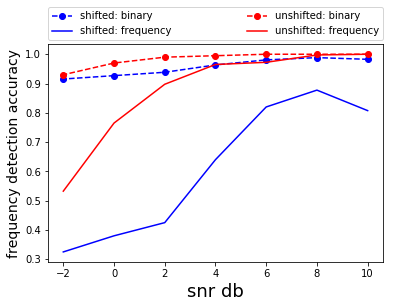

In [3]:
# comparing random shifting vs no shifting 
# layers=6, inputs = 3nlog(n), possible=1024
# test set size=400


plt.plot(np.load('../data/divide_conquer/snrs_1024shift.npy'), np.load('../data/divide_conquer/snr_acc_binary_1024shift.npy'), '--bo', label='shifted: binary')
plt.plot(np.load('../data/divide_conquer/snrs_1024shift.npy'), np.load('../data/divide_conquer/snr_acc_frequency_1024shift.npy'), 'b', label='shifted: frequency')

plt.plot(np.load('../data/divide_conquer/snrs.npy'), np.load('../data/divide_conquer/snr_acc_binary.npy'), '--ro', label='unshifted: binary')
plt.plot(np.load('../data/divide_conquer/snrs.npy'), np.load('../data/divide_conquer/snr_acc_frequency.npy'), 'r', label='unshifted: frequency')

plt.xlabel('snr db', fontsize=18)
plt.ylabel('frequency detection accuracy', fontsize=14)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

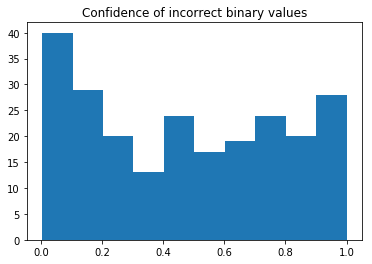

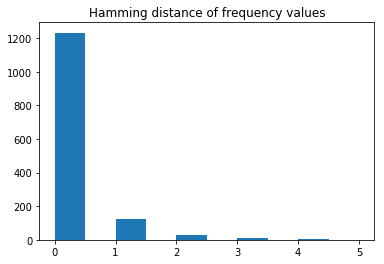

In [4]:
bins = np.load('../data/testing/acc_binary.npy')
freqs = np.load('../data/testing/acc_frequency.npy')
all_preds = np.load('../data/testing/preds_frequency.npy')
all_actuals = np.load('../data/testing/actuals_frequency.npy')
preds = np.reshape(all_preds, -1)
actuals = np.reshape(all_actuals, -1)
wrongs = []
for p, a in zip(preds, actuals):
    if int(np.round(p)) != int(a):
        wrongs.append(p)
plt.hist(wrongs)
plt.title('Confidence of incorrect binary values')
plt.show()
hammings = []
for i in range(len(preds) // 10):  # 10 = log(1024)
    hammings.append(np.sum([int(round(preds[i*10 + j])) != int(actuals[i*10 + j]) for j in range(10)]))
plt.hist(hammings)
plt.title('Hamming distance of frequency values')
plt.show()

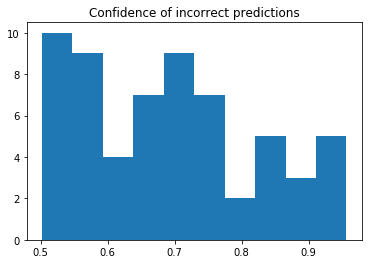

In [5]:
#plt.plot(np.load('../data/testing/snrs_single.npy'), np.load('../data/testing/nn_single_single.npy'), 'r')
#plt.plot(np.load('../data/testing/snrs_single.npy'), np.load('../data/testing/kay_single_single.npy'), 'b')
#plt.show()

preds = np.load('../data/testing/preds_single.npy')
actuals = np.load('../data/testing/actuals_single.npy')
wrongs = []
for i in range(len(preds)):
    for j in range(len(preds[i])):
        if np.argmax(preds[i][j]) != np.argmax(actuals[i][j]):
            wrongs.append(np.max(preds[i][j]))

plt.hist(wrongs)
plt.title('Confidence of incorrect predictions')
plt.show()